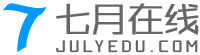


# 七月在线 《Python基础入门 第三期》 第四课 函数（上）


> [七月在线](https://www.julyedu.com) David@2018-12-10

## 本节课程目标
### 复习上节课内容
### 函数定义，函数体，位置参数与关键字参数，函数返回值
### 不定长位置参数与关键字参数
### 偏函数
### Python中的LEGB访问规则

### 完成课后作业：

## 函数定义，函数结构，位置参数与关键字参数，函数返回值

### 函数定义，与函数结构

In [4]:
l1=[1,'s','china']
s1={'f',56}
d1={'name':'jack'}
len(s2)

3

In [5]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

In [19]:
#函数定义与函数结构
def myfunc1(parm1,parm2='amazing'):
    "\
    here is document for this function\
    multi lines \
    "#__doc__ here
    
    something=parm1
    
    return str(something)+' is '+parm2

myfunc1
myfunc1('china')

'china is amazing'

In [15]:
%whos

Variable   Type        Data/Info
--------------------------------
d1         dict        n=1
l1         list        n=3
myfunc1    function    <function myfunc1 at 0x0000026ABDFC8A60>
s1         set         {'f', 56}


##### 延伸阅读:Python3新增函数特性：注释增强/Annotations

In [20]:
def myfunc1(parm1:'parm user given string to output',parm2:'this parm default value is amazing, user still can replace it'='amazing')-> 'function return should be a string':
    "#__doc__ here"
    something=parm1
    return str(something)+' is '+parm2
myfunc1.__annotations__

{'parm1': 'parm user given string to output',
 'parm2': 'this parm default value is amazing, user still can replace it',
 'return': 'function return should be a string'}

##### 延伸阅读:
def:运行期指令，以代码对象为参数创建函数实例，并在当前上下文中与指定的名字相关联

In [21]:
#def是运行期指令
import dis;dis.dis(compile("def test():pass","","exec"))

  1           0 LOAD_CONST               0 (<code object test at 0x0000023812E75A50, file "", line 1>)
              2 LOAD_CONST               1 ('test')
              4 MAKE_FUNCTION            0
              6 STORE_NAME               0 (test)
              8 LOAD_CONST               2 (None)
             10 RETURN_VALUE


In [23]:
#def的伪码
#test=make_function('test',code)#dis操作是在函数实例创建完成后针对__code__，而非针对创建过程

#以单个代码对象为模板创建多个函数实例
def make_func(n):
    ret=[]
    for i in range(n):
        def test():print('hello',n)
        print(id(test),id(test.__code__))
        ret.append(test)
    return ret

make_func(4)#不同实例，相同代码，也可以不同实例，不同代码（属性动态添加）

2439859905536 2439860375248
2439859734184 2439860375248
2439859735408 2439860375248
2439859734864 2439860375248


[<function __main__.make_func.<locals>.test()>,
 <function __main__.make_func.<locals>.test()>,
 <function __main__.make_func.<locals>.test()>,
 <function __main__.make_func.<locals>.test()>]

##### 延伸阅读：Python的函数对象PyFunctionObject：
>作用：为上下文提供调用实例，并管理所需的状态数据。负责管理运行期状态，如默认参数，动态添加的属性，由MAKE_FUNCTION指令创建

In [21]:
def test1(a,b,c=1):
    str1='julyedu.com'
    print(c)
    return b

In [71]:
#探索PyFunctionOjbect
def test1(a,b,c=1):
    str1='julyedu.com'
    print(c)
    return b

'co_name',test1.__code__.co_name#函数名
'co_object',test1.__code__# PyCodeObject<code object test1 at 0x0000023812E75A50, file "<ipython-input-14-1306b5bc9b20>", line 1>
'co_code',test1.__code__.co_code#函数中的代码对象字节码（二进制存储）
'co_lnotab',test1.__code__.co_lnotab#'字节码的偏移值与对应的源码的行号的相对值'


'co_filename',test1.__code__.co_filename#函数所在文件名<ipython-input-16-fc6b304ba0cd>
'co_firstlineno',test1.__code__.co_firstlineno#函数在文件中的首行的行数1

'co_stacksize',test1.__code__.co_stacksize#占用了几个栈桢

('co_name', 'test1')

('co_object',
 <code object test1 at 0x0000023813057780, file "<ipython-input-71-22c079bb329c>", line 2>)

('co_code', b'd\x01}\x03t\x00|\x02\x83\x01\x01\x00|\x01S\x00')

('co_lnotab', b'\x00\x01\x04\x01\x08\x01')

('co_filename', '<ipython-input-71-22c079bb329c>')

('co_firstlineno', 2)

('co_stacksize', 2)

('符号名集合co_names', ('print',))

('常量集合co_const', (None, 'julyedu.com'))

##### 扩展阅读：栈(Stack)与栈帧（Stack Frame）

Python中栈的分类：
> 用户栈：函数被调用时，会专门为其分配用户栈内存，用户栈内存除用来存储变量外，还包括字节码参数和返回值所需空间。   
> 系统栈：用于机器执行，用户栈用于代码执行状态。


Python中栈的作用：
> 栈用于指令执行，与线程绑定。函数调用与执行都依赖于线程栈上存储的上下文和执行状态。

```
import dis
def test(a,b):
    c=a+b
    return c
    
dis.dis(test)

  2           0 LOAD_FAST                0 (a) #从Fast读取参数a,压入用户栈
              2 LOAD_FAST                1 (b)#从Fast读取参数b,压入用户栈
               4 BINARY_ADD                  #系统指令从用户栈读取操作数，执行加法操作
              6 STORE_FAST               2 (c)#结果写回Fast

  3           8 LOAD_FAST                2 (c)
             10 RETURN_VALUE
```

栈帧（Stack Frame）
> 线程栈这块内存中，每个被调用函数都分配着一块区域
> Call stack是函数调用堆栈（运行时函数的调用过程）,除返回地址，还有为函数提供参数，局部变量存储空间等

调用函数时的内存变化：
>函数每次调用，都会新建栈帧，用于局部变量和执行过程存储。执行完成后，栈帧内存被回收，同时释放相关对象。

In [12]:
def test():
    return id(locals())

print(test())#Create New StackFrame
print(test())#Create Another New StackFrame

2439859900488
2439859902432


查看栈帧对象PyFrameObject
> PyFrameObject,栈帧表示程序运行时函数调用栈中的某一帧。函数没有属性可以获取它，因为它在函数调用时才会产生   
> 想要获得某个函数相关的栈帧，则必须在调用这个函数且这个函数尚未返回时获取。


>sys._getframe()方法可以获取当前栈帧   
>>_back: 调用栈的前一帧   
>>f_code: 栈帧对应的code对象   
>>f_locals: 用在当前栈帧时与内建函数locals()相同，但你可以先获取其他帧然后使用这个属性获取那个帧的locals()   
>>f_globals: 用在当前栈帧时与内建函数globals()相同，但你可以先获取其他帧……   
>>f_builtins -> dict key:  python的内置函数名   


In [25]:
import sys
def func():    
    frame = sys._getframe()
    print(frame.f_locals)
    print(frame.f_globals)
    print(frame.f_back.f_locals)
    #你可以打印frame的各个域
    print(s)
func()    

{'frame': <frame object at 0x00000238130365E8>}
{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', '#函数定义与函数结构\ndef myfunc1(parm1,parm2=\'amazing\'):\n    "    here is document for this function    multi lines     "#__doc__ here\n    \n    something=parm1\n    \n    return str(something)+\' is \'+parm2\n\nmyfunc1(\'daivd\')\nmyfunc1(\'daivd\',\'perfect\')', '#函数定义与函数结构\ndef myfunc1(parm1,parm2=\'amazing\'):\n    "    here is document for this function    multi lines     "#__doc__ here\n    \n    something=parm1\n    \n    return str(something)+\' is \'+parm2\n\nmyfunc1(\'daivd\')\nmyfunc1(\'daivd\',\'perfect\')', "from inspect import signature# 注意是小写的signature\n\ndef func(parm1,parm2='kw'):\n    return parm1\n\ndef func(parm1):\n    pass\n\n# 获取函数签名\nfunc_sig = signature

NameError: name 's' is not defined

In [26]:
import sys
value = 3
def A():
    frame = sys._getframe()
    print ('current function is : ', frame.f_code.co_name)
    caller = frame.f_back
    print ('caller function is : ', caller.f_code.co_name)
    print ("caller's local namespace : ", caller.f_locals)
    print ("caller's global namespace : ",caller.f_globals.keys())
def B():
    a = 1
    b = 2
    print('------')
    A()
    print('------')
    
B()

cf=sys._current_frames()

------
current function is :  A
caller function is :  B
caller's local namespace :  {'b': 2, 'a': 1}
caller's global namespace :  dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'myfunc1', '_1', '_i2', '_2', '_i3', 'signature', 'func', 'func_sig', 'func_params', '_3', '_i4', 'test1', '_4', '_i5', '_i6', '_6', '_i7', 'myadd1', '_7', 'myadd2', 'myadd3', '_i8', '_i9', '_i10', 'test', '_i11', '_i12', '_i13', '_13', '_i14', '_14', '_i15', '_15', '_i16', '_16', '_i17', '_i18', 'add', '_i19', 'dis', '_i20', '_i21', '_i22', '_i23', 'make_func', '_23', '_i24', '_i25', 'sys', '_i26', 'value', 'A', 'B'])
------


In [170]:
import sys,dis
def A():
    x='func A'
    B()

def B():
    C()

def C():
    c_var='test'
    f=sys._getframe(0)#向上2级，获取A栈帧,1获取B,0是当前
    print('frame及遍历---------------------------------------------------------------') 
    print(f.f_code.co_name,'栈帧类型和对象:',type(f),f)  
#     print('遍历:',dir(f))
    print('名字空间---------------------------------------------------------------')
#     print('函数所在模块的的名字空间f_globalsa或直接globals():',f.f_globals)#返回函数所在模块的的名字空间
#     print('frame f_builtins:',f.f_builtins)#A人   
    print(f.f_code.co_name,'名字空间f_locals（运行期）:',f.f_locals)#A名字空间（运行期）
    print('代码对象---------------------------------------------------------------')    
    print(f.f_code.co_name,'代码对象f_code:',f.f_code)#A代码对象
    print(f.f_code.co_name,'代码对象f_fileno:',f.f_lineno)#所在文件行数   
    print(f.f_code.co_name,'最后执行指令的偏移量f_lasti:',f.f_lasti)#A最后执行指令的偏移量

    print('栈帧对象---------------------------------------------------------------')        
    print(f.f_code.co_name,' frame f_back:',f.f_back)#前一帧对象
    print(f.f_code.co_name,' frame f_trace:',f.f_trace)#trace对象
    
    print('f_code,---------------------------------------------------------------')        
    print('该f_code即为对应函数的代码对象-------------------------')
#     print('遍历f_code:',dir(f.f_code))
    print('co_stacksize',f.f_code.co_stacksize)
    

A()

frame及遍历---------------------------------------------------------------
C 栈帧类型和对象: <class 'frame'> <frame object at 0x0000023812BE0298>
名字空间---------------------------------------------------------------
C 名字空间f_locals（运行期）: {'f': <frame object at 0x0000023812BE0298>, 'c_var': 'test'}
代码对象---------------------------------------------------------------
C 代码对象f_code: <code object C at 0x0000023813098E40, file "<ipython-input-170-06ace6844c46>", line 9>
C 代码对象f_fileno: 21
C 最后执行指令的偏移量f_lasti: 126
栈帧对象---------------------------------------------------------------
C  frame f_back: <frame object at 0x0000023812BCCEA8>
C  frame f_trace: None
f_code,---------------------------------------------------------------
该f_code即为对应函数的代码对象-------------------------
co_stacksize 5


返回所有栈帧
> sys._current_frames()#返回一个dict对象

In [28]:
import sys
sys._current_frames()#返回一个dict

{6792: <frame at 0x26abc39a278>,
 7640: <frame at 0x26abaaa24e8>,
 9380: <frame at 0x26abad67938>,
 10816: <frame at 0x26abcf05cf8>,
 13344: <frame at 0x26abada6008>}

### 函数的参数:位置参数（定位参数）     与       关键字参数

#### 位置参数（定位参数）

In [ ]:
def myadd2(a,b):
    return a+b

def myadd3(a,b,c):
    return a+b+c

def myadd4(a,b,c,d):
    print(d)

In [35]:
#个数匹配

##### 扩展阅读： Python可选位置参数

Python内置电池round函数的帮助中，出现了[, ndigits]这个东东。
其它的一些Python对象提供的方法中也有类似的东东出没，比如对序列对象进行切片访问时。

就是Python可选位置参数。

注意：这样的参数是无法通过自定义函数来创建的。只有Python中的内置函数可以。


```
Help on built-in function round in module builtins:

round(...)
    round(number[, ndigits]) -> number
    
    Round a number to a given precision in decimal digits (default 0 digits).
    This returns an int when called with one argument, otherwise the
    same type as the number. ndigits may be negative.

```

### 关键字参数

In [ ]:
#关键字参数，与不定长关键字参数
def myadd0(args,lastnum=1000):
    return args+lastnum

myadd0(7)

In [47]:
def myadd(parm1,parm2=500):
    print(parm1+parm2)
    
def myadd(parm1,parm2=500,parm3=5):
    print(parm1+parm2)    
    
myadd?

##### 扩展阅读：查看函数签名

In [45]:
from inspect import signature# 注意是小写的signature

def func(parm1,parm2='kw'):
    return parm1

def func(parm1):
    pass

# 获取函数签名
func_sig = signature(func)
# 通过函数签名的parameters属性，可以获取函数参数
func_params = func_sig.parameters
func_params

#或者直接使用ipython下的?

mappingproxy({'parm1': <Parameter "parm1">})

##### 扩展阅读：函数参数在`__code__`对象下的反映

In [72]:
def test1(a,b,c=1):
    str1='julyedu.com'
    return b
    
'co_argcount',test1.__code__.co_argcount#位置参数的个数，而co_nlocals是局部变量数目，包括位置参数在内。
'co_nlocals&co_varnames',test1.__code__.co_nlocals,test1.__code__.co_varnames#多少个局部变量,以及及变量的名字。

'符号名集合co_names',test1.__code__.co_names   #符号名集合
'常量集合co_const',test1.__code__.co_consts  #常量集合


# 位置参数，键（关键字）参数，*args扩展位置参数[元组对象]和**kwargs扩展键（关键字）参数[字典]。

# 位置参数还能设置默认值，如果有默认值，默认值是在MAKE_FUNCTION指令赋值给`funcname.__defaults__`的。

'co_flags',test1.__code__.co_flags
# 【1】function没有args或*kw时，`funcname.__code__.co_flags=67`;
# 【2】function有args没有*kw时，funcname.__code__.co_flags=71;
# 【3】function没有args有*kw时，funcname.__code__.co_flags=75;
# 【4】function既有args也有*kw时，funcname.__code__.co_flags=79;
# 【5】function是一个generator时，funcname.__code__.co_flags=99.

#对于像 def f(a, b, *lst):这样的函数，如果调用函数时参数为f(1,2,3,4)，其实在PyCodeObject对象中的co_argcount=2, co_nlocals=3。

('co_argcount', 3)

('co_nlocals&co_varnames', 4, ('a', 'b', 'c', 'str1'))

('符号名集合co_names', ())

('常量集合co_const', (None, 'julyedu.com'))

('co_flags', 67)

##### 扩展阅读：动态管理函数对象的参数的默认值与属性

In [116]:
##函数对象参数的默认值存放在函数对象的,__defaults__属性中，是一个Tuple类对象

#字节数换算为KB，MB,GB,TB
def CaluSize(bytesize,trans='KB'):
    if trans=='KB':size=1024
    if trans=='MB':size=1024**2
    if trans=='GB':size=1024**3
    if trans=='TB':size=1024**4
    return str(bytesize//size)+trans
CaluSize.__defaults__

CaluSize.__defaults__=('TB',)
CaluSize.__defaults__

CaluSize(110241550654651654544)

('KB',)

('TB',)

'100264106TB'

In [117]:
##函数对象属性
##函数对象属性值存放在函数对象的,__dict__属性中，是一个Dict类对象
CaluSize
CaluSize.__dict__
CaluSize.__dict__['new_atrr']='test'
CaluSize.__dict__

<function __main__.CaluSize(bytesize, trans='TB')>

{}

{'new_atrr': 'test'}

### 函数返回值 

In [ ]:
#函数返回值      
#有返回值 与无返回值（即使没有return语句，依旧会return一个NoneType类的对象None)

def myadd(a):
    return a,5

def myadd1(a,b,c,d):
    print(a+b+c+d)

def myadd2(a,b):
    pass

##  不定长位置参数与不定长关键字参数

### 不定长位置参数

In [7]:
def myadd1(a,b,c,d,*parms):
    print(type(parms))
    print('parms:',parms)
    print('a,b,c,d:',a,b,c,d)
    return sum(parms)

myadd1(1,2,3,4,5,6)

def myadd2(arg,*args):
    print(type(args))
    print(args)
    return sum(args)

myadd2(18,1,2,3)


def myadd3(arg,*args):
    print(type(args))
    print(args)
    return sum(args)
myadd3(18,1,2,3)

<class 'tuple'>
parms: (5, 6)
a,b,c,d: 1 2 3 4


11

<class 'tuple'>
(1, 2, 3)


6

<class 'tuple'>
(1, 2, 3)


6

### 不定长关键字参数

In [ ]:
def myadd(**kwargs):
    print(kwargs)
    
myadd(add='sh',tel=13333,name='jack',height=178)

myadd(address='sh',cellphone=13333,)


def myaddkw(**names):
    print(type(names))
    print(list(names.values()))
    return list(names.values())
    
myaddkw(name='david',gender='male',age=0)
myadd0(args=5, lastnum=6)

### 综合使用

In [83]:
l1=[1,2,3,4,5,6]
a,b,c,d,e,f=l1
f

6

In [74]:
l1=[1,2,3,4,5,6]
a,b,*c,d,e=l1
a,b,c,d,e

def myfun1(*args,**kwargs):
    print(args)
    for item in kwargs:
         print(item)
d1={'name':'david','add':'bj','date':'2018-8-1'}
l1=[1,2,3,4,5,6,7]
myfun1(*l1,**d1)

(1, 2, 3, 4, 5, 6, 7)
name
add
date


##### 扩展阅读:Python函数参数中的`/`与`*`

In [55]:
sorted?

In [171]:
l1=['China','Japan','UK','Beijing']

#Signature: sorted(iterable, /, *, key=None, reverse=False)
#参数/是指，iterable这个参数只能以位置参数形式给，不能以关键字参数形式给，否则报错
#这类参数只能在C API中被指定，def定义会报错

#正常
sorted(l1)
#报错
#sorted(iterable=l1)#TypeError: Function takes at least 1 positional arguments (0 given)

#参数*是指，key这个参数只能以关键字参数形式给，不能以位置参数形式给，以否则报错
#这类参数可以自行定义
#正常
sorted(l1,key=lambda x:(x[-2]))
#报错
# sorted(l1,lambda x:(x[-1]))#TypeError: must use keyword argument for key function


['Beijing', 'China', 'Japan', 'UK']

['UK', 'Japan', 'China', 'Beijing']

## 偏函数

In [79]:
#偏函数,固定了部分参数的函数

import functools

a=0x24
a
int(str(a),base=32)

hex2int=functools.partial(int,base=16)

type(hex2int)
# hex2int(str(a))

functools.partial

In [80]:
def mysal(nums,rate=6.95):
    return nums*rate

mysal(5000)
mysal(12000)

import functools
rmb2eur=functools.partial(mysal,rate=1.01)
rmb2jpn=functools.partial(mysal,rate=82)

rmb2jpn(5000)

410000

## Python中的LEGB访问规则

### 先讲LGB这三层楼（名字空间），E这层楼下节课会讲到

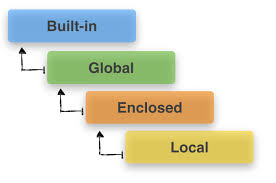

In [84]:
def a():
    f=15
    print(locals())
    
a()
f

{'f': 15}


6

##### 扩展阅读：Eval与Exec这两个函数在名字空间

In [161]:
# exec?
# Signature: exec(source, globals=None, locals=None, /)
# Docstring:
# Execute the given source in the context of globals and locals.


#要exec的python源码
ns={}#传入的容器是空的
exec('def inside_func():pass',ns)
ns['inside_func']#返回的窗器是带有结果的，也就是说传入名字空间被改变了

<function inside_func()>

In [167]:
s='''
def test():
    print(hex(id(locals())),__name__)
    #exec的代码是以builtins模块下进行运行的

test()
'''
g={'g':666}#传给s的全局名字空间
print('入口程序模块：',hex(id(ns)),__name__)

exec(s,g)

%whos

入口程序模块： 0x23813168ea0 __main__
0x238130b84c8 builtins
Variable   Type    Data/Info
----------------------------
g          dict    n=3
l          dict    n=2
ns         dict    n=2
s          str     \ndef test():\n    print(<...>ltins模块下进行运行的\n\ntest()\n


In [158]:
#eavl,显示传入容器对象做为动态代码的专用名字空间
# Signature: eval(source, globals=None, locals=None, /)
# Docstring:
# Evaluate the given source in the context of globals and locals.

g={"x":100}
l={"y":101}

eval("x+y",g,l)

201

## 完成课后作业：

### 实现能输出指定长度fib数列函数

### 定义一个函数，接受任意三个数字的输入，并按顺序从小到大输出

### 自己实现一个支持可变参数的函数

### 要求创建一个函数，它可以接收，位置参数，不定长位置参数，不定长关键词参数，并按要求输出 。
- 输入班级名，班级特色（如’勤奋’,’颜值高’ ）等等不同特色，班级不同同学的姓名与年龄。
- 要求输出，班级名，班级特色，班级成员，班级成员的平均年龄。

### 创建能根据输入计算BMI指数的函数

身体质量指数（BMI）是根据人的体重和身高计算得出的一个数字，BMI是可靠的身体肥胖指标，其计算公式：BMI=Weight/High2，其中体重单位为公斤，身高单位为米。

- 计算公式为：$BMI=体重（kg）÷身高^2（m）$

- 提示用户输入体重（kg）和身高的数字(m)(注意单位），然后计算BMI。

- 根据BMI指数范围，定义当前健康状态。BMI指数在18至25之间定义为健康的标准体重,小于该范围定义为偏瘦，超过该范围定义为偏重。

- 将BMI指数和其所代表状态输出 